In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/most-streamed-spotify-songs-2024/Most Streamed Spotify Songs 2024.csv


# Installing and importing dependencies

In [2]:
!pip install chardet
!pip install dash
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import chardet
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import dash
from dash import dcc
from dash import html 
from dash.dependencies import Input, Output

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 3.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 46.9 MB/s eta 0:00:0000:0100:01


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
with open('/kaggle/input/most-streamed-spotify-songs-2024/Most Streamed Spotify Songs 2024.csv', 'rb') as file:
    data = file.read(200000)
    result = chardet.detect(data)
    encoding = result['encoding']
    print(f"Detected encoding: {encoding}")

Detected encoding: ISO-8859-1


# Importing the dataset

In [5]:
df = pd.read_csv('/kaggle/input/most-streamed-spotify-songs-2024/Most Streamed Spotify Songs 2024.csv',encoding="ISO-8859-1")

In [6]:
df.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


In [7]:
# Shape of the data
df.shape

(4600, 29)

# Understanding the datatypes

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

* here datatypes are need to be changed

In [9]:
df.isnull().sum()

Track                            0
Album Name                       0
Artist                           5
Release Date                     0
ISRC                             0
All Time Rank                    0
Track Score                      0
Spotify Streams                113
Spotify Playlist Count          70
Spotify Playlist Reach          72
Spotify Popularity             804
YouTube Views                  308
YouTube Likes                  315
TikTok Posts                  1173
TikTok Likes                   980
TikTok Views                   981
YouTube Playlist Reach        1009
Apple Music Playlist Count     561
AirPlay Spins                  498
SiriusXM Spins                2123
Deezer Playlist Count          921
Deezer Playlist Reach          928
Amazon Playlist Count         1055
Pandora Streams               1106
Pandora Track Stations        1268
Soundcloud Streams            3333
Shazam Counts                  577
TIDAL Popularity              4600
Explicit Track      

In [10]:
df.drop(columns=['Soundcloud Streams','TIDAL Popularity'], axis=1,inplace=True)

In [11]:
def remove(x):
    return x.replace(",","")

df["All Time Rank"]=df["All Time Rank"].apply(remove)
df["All Time Rank"]

0          1
1          2
2          3
3          4
4          5
        ... 
4595    4585
4596    4575
4597    4571
4598    4591
4599    4593
Name: All Time Rank, Length: 4600, dtype: object

In [12]:
pd.to_numeric(df["All Time Rank"])

0          1
1          2
2          3
3          4
4          5
        ... 
4595    4585
4596    4575
4597    4571
4598    4591
4599    4593
Name: All Time Rank, Length: 4600, dtype: int64

In [13]:
def remove(x):
    return x.replace(",","")

In [14]:
df["Release Date"]=pd.to_datetime(df["Release Date"])

In [15]:
df = df.map(lambda x: x.replace(',','') if isinstance(x,str) else x)
df

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,Apple Music Playlist Count,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Shazam Counts,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1,725.4,390470936,30716,196631588,...,210.0,40975,684,62.0,17598718,114.0,18004655,22931,2669262,0
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,2,545.9,323703884,28113,174597137,...,188.0,40778,3,67.0,10422430,111.0,7780028,28444,1118279,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387,3,538.4,601309283,54331,211607669,...,190.0,74333,536,136.0,36321847,172.0,5022621,5639,5285340,0
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,USSM12209777,4,444.9,2031280633,269802,136569078,...,394.0,1474799,2182,264.0,24684248,210.0,190260277,203384,11822942,0
4,Houdini,Houdini,Eminem,2024-05-31,USUG12403398,5,423.3,107034922,7223,151469874,...,182.0,12185,1,82.0,17660624,105.0,4493884,7006,457017,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,2017-09-05,QM8DG1703420,4585,19.4,305049963,65770,5103054,...,3.0,6,NaN,2.0,14217,NaN,20104066,13184,656337,1
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,2018-07-27,INT101800122,4575,19.4,52282360,4602,1449767,...,1.0,412,NaN,1.0,927,NaN,NaN,NaN,193590,0
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2020-02-28,USUG12000043,4571,19.4,189972685,72066,6704802,...,19.0,204,NaN,1.0,74,6.0,84426740,28999,1135998,1
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,2016-11-08,INY091600067,4591,19.4,145467020,14037,7387064,...,1.0,1200,NaN,NaN,NaN,7.0,6817840,NaN,448292,0


In [16]:
for x in df.columns[6:]:
    df[x] = pd.to_numeric(df[x],downcast="integer")
    print(df[x].dtype)

float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
int8


In [17]:
df.info()
# Data types has been correctly assigned based on the columns data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Track                       4600 non-null   object        
 1   Album Name                  4600 non-null   object        
 2   Artist                      4595 non-null   object        
 3   Release Date                4600 non-null   datetime64[ns]
 4   ISRC                        4600 non-null   object        
 5   All Time Rank               4600 non-null   object        
 6   Track Score                 4600 non-null   float64       
 7   Spotify Streams             4487 non-null   float64       
 8   Spotify Playlist Count      4530 non-null   float64       
 9   Spotify Playlist Reach      4528 non-null   float64       
 10  Spotify Popularity          3796 non-null   float64       
 11  YouTube Views               4292 non-null   float64     

# Treating Missing Values

In [18]:
df.isnull().sum()

Track                            0
Album Name                       0
Artist                           5
Release Date                     0
ISRC                             0
All Time Rank                    0
Track Score                      0
Spotify Streams                113
Spotify Playlist Count          70
Spotify Playlist Reach          72
Spotify Popularity             804
YouTube Views                  308
YouTube Likes                  315
TikTok Posts                  1173
TikTok Likes                   980
TikTok Views                   981
YouTube Playlist Reach        1009
Apple Music Playlist Count     561
AirPlay Spins                  498
SiriusXM Spins                2123
Deezer Playlist Count          921
Deezer Playlist Reach          928
Amazon Playlist Count         1055
Pandora Streams               1106
Pandora Track Stations        1268
Shazam Counts                  577
Explicit Track                   0
dtype: int64

In [19]:
df.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,Apple Music Playlist Count,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Shazam Counts,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1,725.4,3.904709e+08,30716.0,196631588.0,...,210.0,40975.0,684.0,62.0,17598718.0,114.0,18004655.0,22931.0,2669262.0,0
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,2,545.9,3.237039e+08,28113.0,174597137.0,...,188.0,40778.0,3.0,67.0,10422430.0,111.0,7780028.0,28444.0,1118279.0,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387,3,538.4,6.013093e+08,54331.0,211607669.0,...,190.0,74333.0,536.0,136.0,36321847.0,172.0,5022621.0,5639.0,5285340.0,0
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,USSM12209777,4,444.9,2.031281e+09,269802.0,136569078.0,...,394.0,1474799.0,2182.0,264.0,24684248.0,210.0,190260277.0,203384.0,11822942.0,0
4,Houdini,Houdini,Eminem,2024-05-31,USUG12403398,5,423.3,1.070349e+08,7223.0,151469874.0,...,182.0,12185.0,1.0,82.0,17660624.0,105.0,4493884.0,7006.0,457017.0,1


In [20]:
df.dropna(subset="Artist",inplace=True)
# since 5 values are missing in artist column its better to drop these rows

In [21]:
df["Artist"].isnull().sum()
# Null values are removed in artist column

0

<Axes: ylabel='Density'>

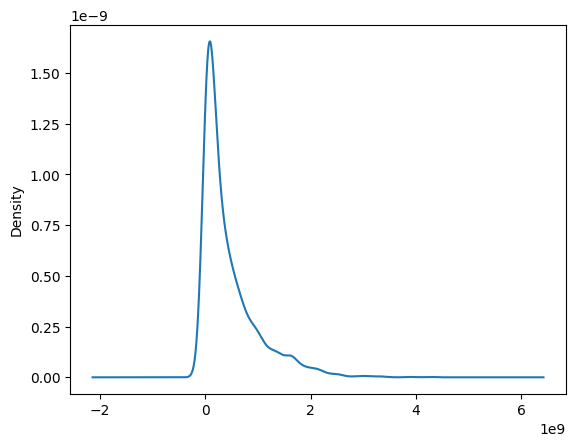

In [22]:
# In Spotify Streams there are 113 null values
df["Spotify Streams"].plot(kind="kde")

In [23]:
# Since the data is right skewed we impute null values with median
df["Spotify Streams"].fillna(df["Spotify Streams"].median(),inplace=True)
df["Spotify Streams"].isnull().sum()

0

In [24]:
# Null values are removed in Spotify Streams column

<Axes: ylabel='Density'>

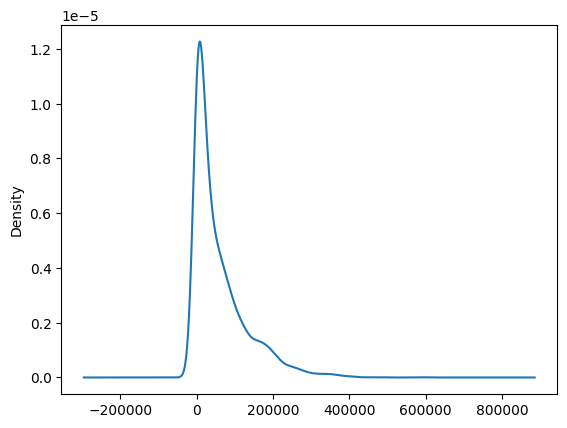

In [25]:
df["Spotify Playlist Count"].plot(kind="kde")

In [26]:
for i in df.select_dtypes(np.number):
    print(i,round(df[i].skew(),2))

Track Score 5.69
Spotify Streams 2.06
Spotify Playlist Count 1.84
Spotify Playlist Reach 2.6
Spotify Popularity -2.05
YouTube Views 6.02
YouTube Likes 4.22
TikTok Posts 7.63
TikTok Likes 32.06
TikTok Views 31.02
YouTube Playlist Reach 3.68
Apple Music Playlist Count 2.89
AirPlay Spins 5.17
SiriusXM Spins 6.08
Deezer Playlist Count 4.79
Deezer Playlist Reach 6.12
Amazon Playlist Count 2.19
Pandora Streams 3.15
Pandora Track Stations 6.72
Shazam Counts 18.48
Explicit Track 0.59


In [27]:
for i in df.columns[7:27]:
    df[i].fillna(df[i].median(),inplace=True)

In [28]:
df.drop_duplicates()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,Apple Music Playlist Count,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Shazam Counts,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1,725.4,3.904709e+08,30716.0,196631588.0,...,210.0,40975.0,684.0,62.0,17598718.0,114.0,18004655.0,22931.0,2669262.0,0
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,2,545.9,3.237039e+08,28113.0,174597137.0,...,188.0,40778.0,3.0,67.0,10422430.0,111.0,7780028.0,28444.0,1118279.0,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387,3,538.4,6.013093e+08,54331.0,211607669.0,...,190.0,74333.0,536.0,136.0,36321847.0,172.0,5022621.0,5639.0,5285340.0,0
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,USSM12209777,4,444.9,2.031281e+09,269802.0,136569078.0,...,394.0,1474799.0,2182.0,264.0,24684248.0,210.0,190260277.0,203384.0,11822942.0,0
4,Houdini,Houdini,Eminem,2024-05-31,USUG12403398,5,423.3,1.070349e+08,7223.0,151469874.0,...,182.0,12185.0,1.0,82.0,17660624.0,105.0,4493884.0,7006.0,457017.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,2017-09-05,QM8DG1703420,4585,19.4,3.050500e+08,65770.0,5103054.0,...,3.0,6.0,86.0,2.0,14217.0,17.0,20104066.0,13184.0,656337.0,1
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,2018-07-27,INT101800122,4575,19.4,5.228236e+07,4602.0,1449767.0,...,1.0,412.0,86.0,1.0,927.0,17.0,12735768.5,7832.0,193590.0,0
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2020-02-28,USUG12000043,4571,19.4,1.899727e+08,72066.0,6704802.0,...,19.0,204.0,86.0,1.0,74.0,6.0,84426740.0,28999.0,1135998.0,1
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,2016-11-08,INY091600067,4591,19.4,1.454670e+08,14037.0,7387064.0,...,1.0,1200.0,86.0,15.0,237120.5,7.0,6817840.0,7832.0,448292.0,0


In [29]:
df.isnull().sum()

Track                         0
Album Name                    0
Artist                        0
Release Date                  0
ISRC                          0
All Time Rank                 0
Track Score                   0
Spotify Streams               0
Spotify Playlist Count        0
Spotify Playlist Reach        0
Spotify Popularity            0
YouTube Views                 0
YouTube Likes                 0
TikTok Posts                  0
TikTok Likes                  0
TikTok Views                  0
YouTube Playlist Reach        0
Apple Music Playlist Count    0
AirPlay Spins                 0
SiriusXM Spins                0
Deezer Playlist Count         0
Deezer Playlist Reach         0
Amazon Playlist Count         0
Pandora Streams               0
Pandora Track Stations        0
Shazam Counts                 0
Explicit Track                0
dtype: int64

In [30]:
df.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,Apple Music Playlist Count,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Shazam Counts,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1,725.4,3.904709e+08,30716.0,196631588.0,...,210.0,40975.0,684.0,62.0,17598718.0,114.0,18004655.0,22931.0,2669262.0,0
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,2,545.9,3.237039e+08,28113.0,174597137.0,...,188.0,40778.0,3.0,67.0,10422430.0,111.0,7780028.0,28444.0,1118279.0,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387,3,538.4,6.013093e+08,54331.0,211607669.0,...,190.0,74333.0,536.0,136.0,36321847.0,172.0,5022621.0,5639.0,5285340.0,0
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,USSM12209777,4,444.9,2.031281e+09,269802.0,136569078.0,...,394.0,1474799.0,2182.0,264.0,24684248.0,210.0,190260277.0,203384.0,11822942.0,0
4,Houdini,Houdini,Eminem,2024-05-31,USUG12403398,5,423.3,1.070349e+08,7223.0,151469874.0,...,182.0,12185.0,1.0,82.0,17660624.0,105.0,4493884.0,7006.0,457017.0,1


In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [32]:
df.columns


Index(['Track', 'Album Name', 'Artist', 'Release Date', 'ISRC',
       'All Time Rank', 'Track Score', 'Spotify Streams',
       'Spotify Playlist Count', 'Spotify Playlist Reach',
       'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts',
       'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins',
       'Deezer Playlist Count', 'Deezer Playlist Reach',
       'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
       'Shazam Counts', 'Explicit Track'],
      dtype='object')

# Linear Regression Model: Training and Evaluation

In [33]:
features = ['Spotify Streams', 'All Time Rank','YouTube Views','Pandora Streams', 'TikTok Likes', 'TikTok Posts','Apple Music Playlist Count', 'Spotify Playlist Count', 'Spotify Playlist Reach','Amazon Playlist Count']
target = 'Spotify Popularity'

X = df[features]
y = df[target]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Linear Regression Mean Squared Error: {mse}')

Linear Regression Mean Squared Error: 192.31104897047666




# **Random Forest Regressor: Training and Evaluation**

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Define and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Random Forest Regressor Mean Squared Error: {mse_rf}')


Random Forest Regressor Mean Squared Error: 148.87044379985497


# Feature Importance Analysis

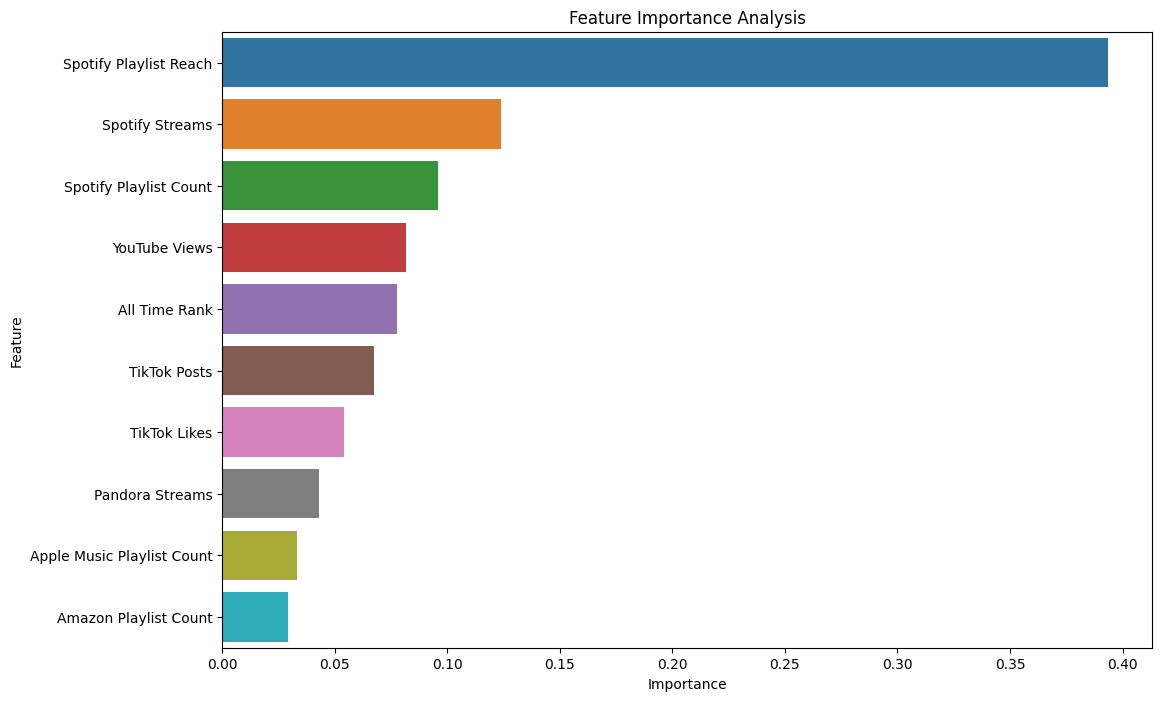

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance Analysis')
plt.show()


# Gradient Boosting Regressor: Training and Evaluation

In [36]:
from sklearn.ensemble import GradientBoostingRegressor

gbm = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=10)
gbm.fit(X_train, y_train)
y_pred_gbm = gbm.predict(X_test)

mse_gbm = mean_squared_error(y_test, y_pred_gbm)
print(f'Gradient Boosting Regressor Mean Squared Error: {mse_gbm}')


Gradient Boosting Regressor Mean Squared Error: 146.33304242968023


# Gradient Boosting Feature Importance Analysis

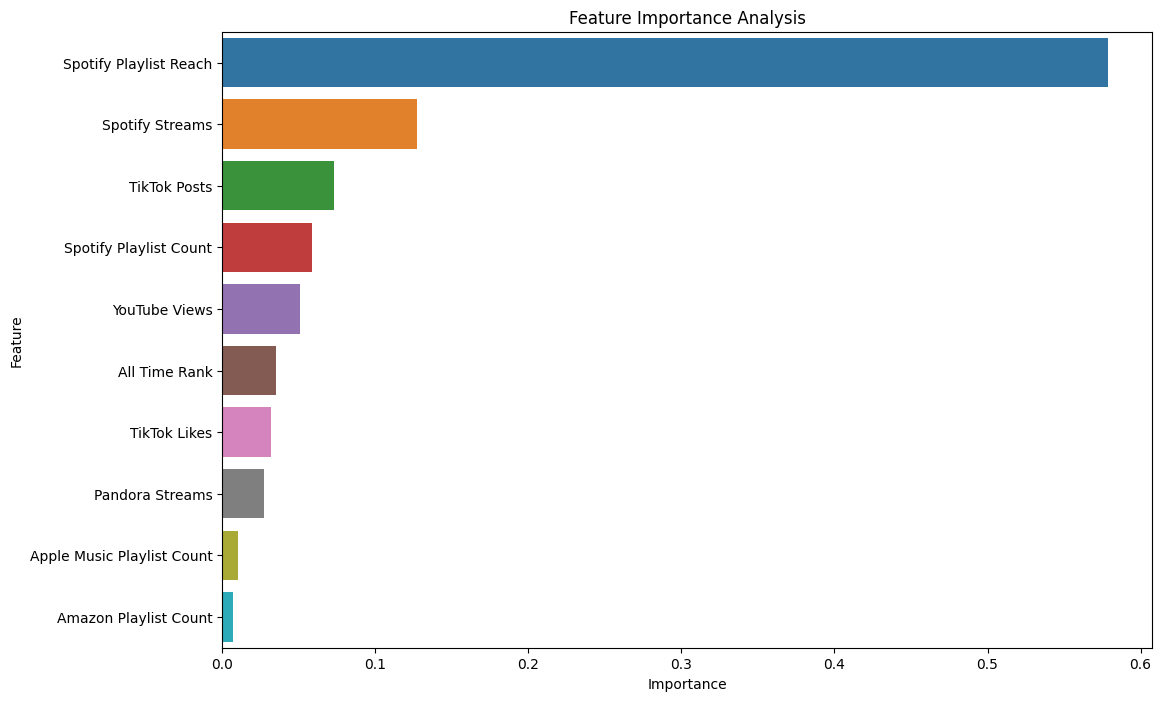

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = gbm.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance Analysis')
plt.show()


# CatBoost Regressor: Training and Evaluation

In [38]:
from catboost import CatBoostRegressor

catboost = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=6, verbose=0)
catboost.fit(X_train, y_train)
y_pred_catboost = catboost.predict(X_test)

mse_catboost = mean_squared_error(y_test, y_pred_catboost)
print(f'CatBoost Regressor Mean Squared Error: {mse_catboost}')


CatBoost Regressor Mean Squared Error: 144.44433442249456


# CatBoost Regressor: Hyperparameter Tuning with GridSearchCV

In [39]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8],
}

catboost = CatBoostRegressor(verbose=0)
grid_search = GridSearchCV(estimator=catboost, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_catboost = grid_search.best_estimator_
y_pred_best_catboost = best_catboost.predict(X_test)
mse_best_catboost = mean_squared_error(y_test, y_pred_best_catboost)
print(f'Best CatBoost Regressor Mean Squared Error: {mse_best_catboost}')


Best CatBoost Regressor Mean Squared Error: 143.97072274153751


# Stacking Regressor: Model Training and Evaluation

In [40]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV

estimators = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=10)),
    ('catboost', CatBoostRegressor(iterations=100, learning_rate=0.1, depth=6, verbose=0))
]

stack = StackingRegressor(estimators=estimators, final_estimator=RidgeCV())
stack.fit(X_train, y_train)
y_pred_stack = stack.predict(X_test)

mse_stack = mean_squared_error(y_test, y_pred_stack)
print(f'Stacking Regressor Mean Squared Error: {mse_stack}')


Stacking Regressor Mean Squared Error: 143.94312352293804
